<a href="https://colab.research.google.com/github/jwala1107/mycollege_demo/blob/main/feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns


In [ ]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
df=df.iloc[:,2:]

In [ ]:
df.sample(5)

,Age,EstimatedSalary,Purchased
220,41,80000,0
87,28,85000,0
380,42,64000,0
143,30,89000,0
337,35,79000,0


In [ ]:
import sklearn

In [ ]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

# Corrected column name from 'Purchesed' to 'Purchased'
x_train,x_test,y_train,y_test=train_test_split(df.drop("Purchased",axis=1),df['Purchased'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape
y_train.shape,y_test.shape

((280,), (120,))

In [ ]:
from sklearn.preprocessing import StandardScaler # Corrected import statement
Scaler = StandardScaler()
Scaler.fit(x_train)
x_train_scaled = Scaler.transform(x_train)
x_test_scaled = Scaler.transform(x_test)

In [ ]:
x_train_scaled


array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [ ]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
y_train_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)


In [ ]:
np.round(x_train.describe(),1)
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


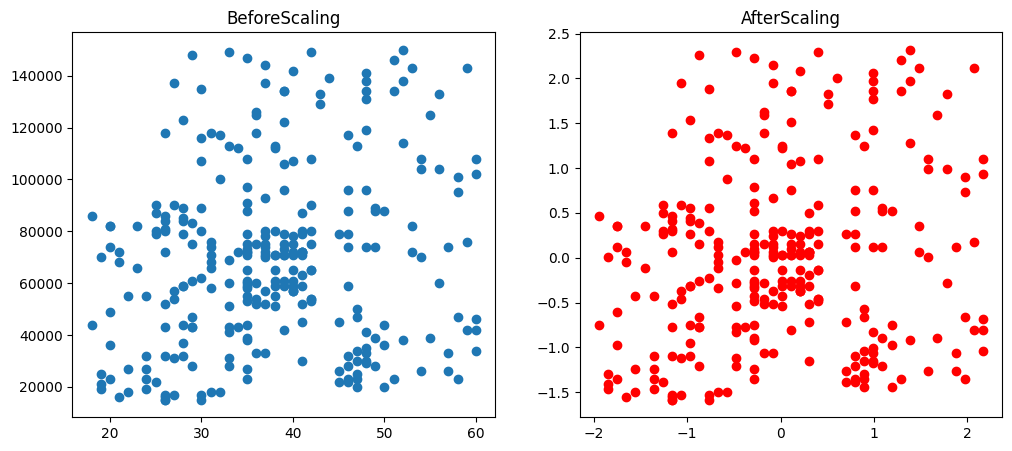

In [ ]:
#effect of scaling
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("BeforeScaling")
ax2.scatter(x_train_scaled["Age"],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('AfterScaling')
plt.show()

ax2.scatter(x_train_scaled["Age"],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('AfterScaling')
plt.show()

KeyError: 'estimatedSalary'

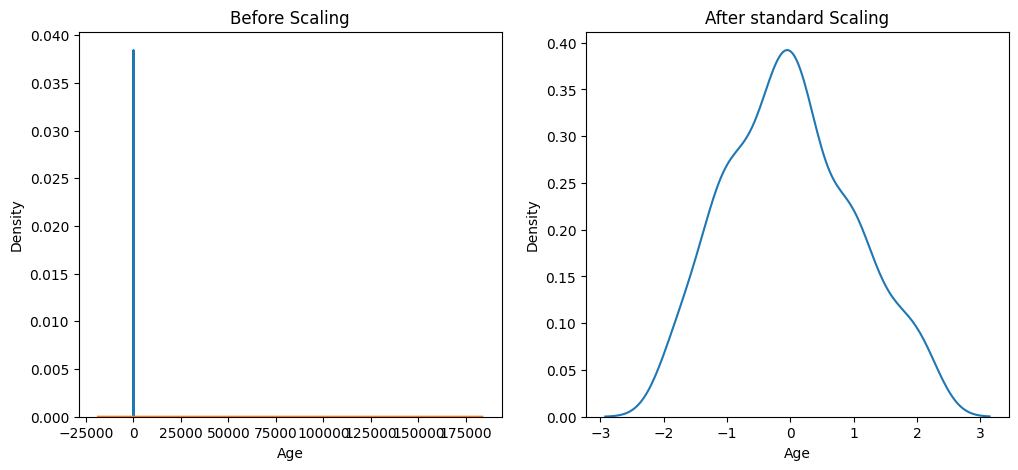

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)
#afterscaling
ax2.set_title('After standard Scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['estimatedSalary'],ax=ax2)
plt.show()

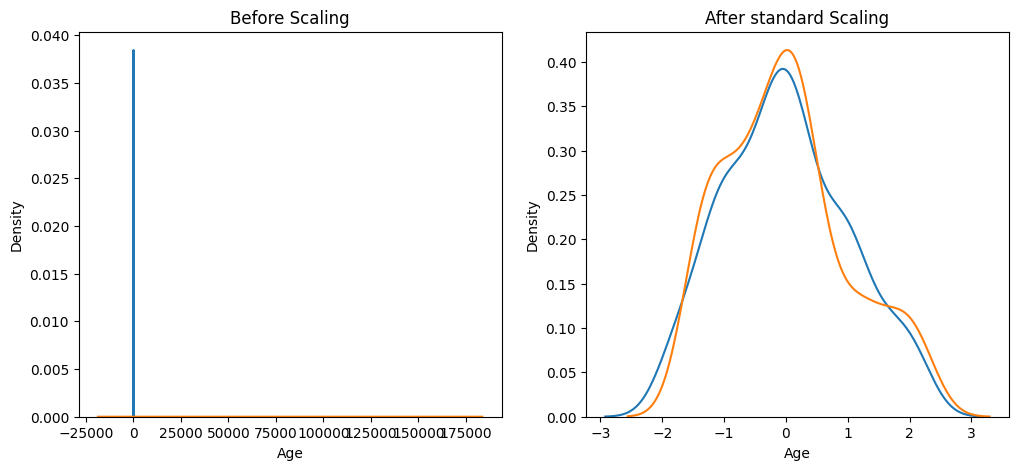

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)
#afterscaling
ax2.set_title('After standard Scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
# Corrected column name from 'estimated Salary' to 'EstimatedSalary'
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

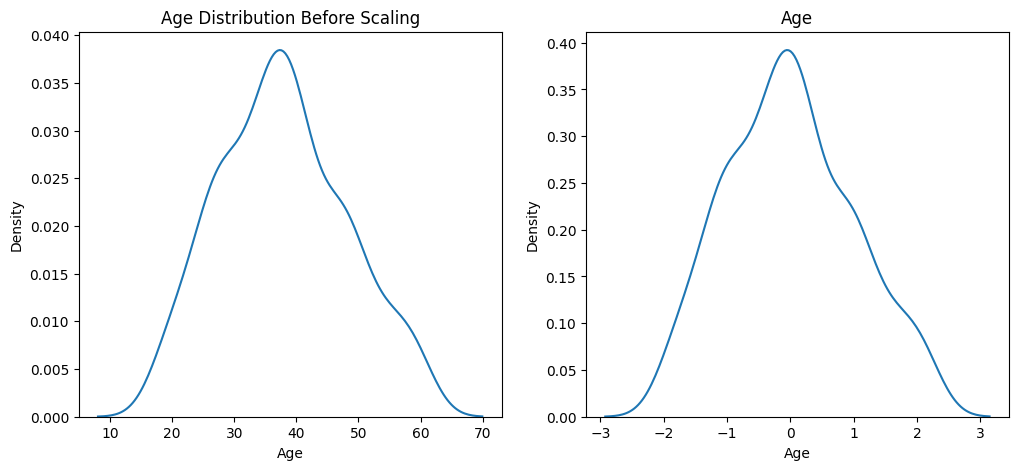

In [ ]:
#COMPARISION OF DISTRIBUTIONS
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
#after scaling
ax2.set_title('Age')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
plt.show()





sns.kdeplot(x_train['Age'],ax=ax1)
#after scaling
ax2.set_title('Age')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
plt.show()




In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()



In [ ]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)
y_prep=lr.predict(x_test)
y_prep_scaled=lr_scaled.predict(x_test_scaled)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score # Corrected the import statement from 'matrics' to 'metrics'
print("Actual",accuracy_score(y_test,y_prep))
print("scaled",accuracy_score(y_test,y_prep_scaled))

Actual 0.875
scaled 0.8666666666666667


In [ ]:
from sklearn.tree import DecisionTreeClassifier
df=DecisionTreeClassifier()
df_scaled=DecisionTreeClassifier()
df.fit(x_train,y_train)
df_scaled.fit(x_train_scaled,y_train)
from sklearn.tree import DecisionTreeClassifier
df=DecisionTreeClassifier()
df_scaled=DecisionTreeClassifier()
df = DecisionTreeClassifier()
df_scaled = DecisionTreeClassifier()
df.fit(x_train,y_train)
df_scaled.fit(x_train_scaled,y_train)
y_pred=df.predict(x_test)
y_pred_scaled=df_scaled.predict(x_test_scaled)
print("Actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))
#df.describe() # Assuming df is a pandas DataFrame, you can use df.describe() to get descriptive statistics.
# If it's a DecisionTreeClassifier object, it won't have a describe method.


Actual 0.875
scaled 0.875


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Assign the DecisionTreeClassifier to dt instead of df
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)
# The following import and assignments are redundant and can be removed
# from sklearn.tree import DecisionTreeClassifier
# df=DecisionTreeClassifier()
# df_scaled=DecisionTreeClassifier()
# dt = DecisionTreeClassifier()
# dt_scaled = DecisionTreeClassifier()
# dt.fit(x_train,y_train)
# dt_scaled.fit(x_train_scaled,y_train)
y_pred=dt.predict(x_test)
y_pred_scaled=dt_scaled.predict(x_test_scaled)
print("Actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))
#df.describe() # Assuming df is a pandas DataFrame, you can use df.describe() to get descriptive statistics.
# If it's a DecisionTreeClassifier object, it won't have a describe method.

Actual 0.875
scaled 0.8666666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming your original DataFrame was named 'original_df'
# If it had a different name, replace 'original_df' with the correct name
# (e.g., the name you used when you first loaded your data)
original_df = pd.read_csv("/content/Social_Network_Ads.csv") # Assuming this is how you loaded your data
original_df = original_df.iloc[:, 2:]  # Assuming this is how you selected your columns

x_train, x_test, y_train, y_test = train_test_split(
    original_df.drop("Purchased", axis=1),
    original_df['Purchased'],
    test_size=0.3,
    random_state=0
)
x_train.shape, x_test.shape
y_train.shape, y_test.shape

((280,), (120,))

In [ ]:
from sklearn.preprocessing import StandardScaler # Corrected import statement
Scaler = StandardScaler()
Scaler.fit(x_train)
x_train_scaled = Scaler.transform(x_train)
x_test_scaled = Scaler.transform(x_test)

In [ ]:
y_train_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [ ]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,